# SupperLottery 50 runs Analysis

### 簡單說明威力彩玩法:
###### 開獎時，開獎單位將從第1區01~38的號碼中隨機開出六個號碼，再從第2區01~08的號碼中隨機開出一個號碼，這一組六個+一個號碼，就是該期威力彩的中獎號碼，也稱為「獎號」。

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
sL50OriginDf = pd.read_html('http://www.9800.com.tw/lotto38/statistics50.html') #匯入網頁中資料

In [3]:
supperLot50 = sL50OriginDf[3] #選取欲使用表格

In [4]:
supperLot50.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,查詢50期：您可以選擇起始和結束的期次方便查詢任意時間段內的威力彩獎號數據統計。以下分析只是...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,期次,開獎日期,第一區,二區,單雙,和值,均值,同尾,連號,首尾差,尾數和,首數和,NaN,NaN,NaN,NaN,NaN
2,107080,2018-10-04,06,15,24,26,28,30,3,1:5,129,21,6尾(2),NaN,24.0,29.0,10.0
3,107081,2018-10-08,09,16,21,24,29,36,3,3:3,135,22,"6尾(2), 9尾(2)",NaN,27.0,35.0,10.0
4,107082,2018-10-11,06,12,14,16,19,21,6,2:4,88,14,6尾(2),NaN,15.0,28.0,6.0


In [5]:
supperLot50 = supperLot50.loc[2:,:8] #選取特定範圍資料

In [6]:
supperLotCol = np.array(['期次', '開獎日期', '第一區_1', '第一區_2', '第一區_3', '第一區_4', '第一區_5', '第一區_6', '第二區']) 
supperLot50.columns = supperLotCol #設定column名稱

In [7]:
sectionOneNum50 = np.arange(1,39) 
sectionTwoNum50 = np.arange(1,9)

In [8]:
sectionOneDf50 = pd.DataFrame(sectionOneNum50,columns=['NumOfSec1']) #先建立第一區可能出現號碼
sectionTwoDf50 = pd.DataFrame(sectionTwoNum50,columns=['NumOfSec2']) #先建立第二區可能出現號碼

In [9]:
#統計個號碼近五十期內出現次數
def add(x1,x2):
    return x1+x2
sectionOneNumCount50 = supperLot50['第一區_1'].value_counts()
for i in range(2,7):
    sectionOneNumCount50= sectionOneNumCount50.combine(supperLot50[f'第一區_{i}'].value_counts(),add, fill_value=0)

sectionTwoNumCount50 = supperLot50['第二區'].value_counts()

In [10]:
sectionTwoNumCount50 = sectionTwoNumCount50.sort_index()

In [11]:
#計算個號碼出現頻率

sectionOneDf50['Count'] = pd.Series(np.array(sectionOneNumCount50),index=sectionOneDf50.index) 
sectionOneDf50['Frequency'] = pd.Series(np.array(sectionOneNumCount50)/50,index=sectionOneDf50.index) 
sectionOneDf50['Rank'] = sectionOneDf50['Frequency'].rank(ascending=False, method='min')

In [12]:
sectionTwoDf50['Count'] = pd.Series(np.array(sectionTwoNumCount50),index=sectionTwoDf50.index) 
sectionTwoDf50['Frequency'] = pd.Series(np.array(sectionTwoNumCount50)/50,index=sectionTwoDf50.index) 
sectionTwoDf50['Rank'] = sectionTwoDf50['Frequency'].rank(ascending=False, method='min')

In [13]:
#一出現次數多寡的排名進行排序
Sone50 = sectionOneDf50.sort_index(by='Rank')                      
Stwo50 = sectionTwoDf50.sort_index(by='Rank')                      

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  """Entry point for launching an IPython kernel.
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  after removing the cwd from sys.path.


In [14]:
Sone50

,NumOfSec1,Count,Frequency,Rank
18,19,12,0.24,1.0
2,3,12,0.24,1.0
19,20,12,0.24,1.0
27,28,12,0.24,1.0
1,2,11,0.22,5.0
20,21,11,0.22,5.0
12,13,11,0.22,5.0
16,17,10,0.20,8.0
26,27,10,0.20,8.0
3,4,10,0.20,8.0


In [15]:
Stwo50

,NumOfSec2,Count,Frequency,Rank
1,2,8,0.16,1.0
0,1,7,0.14,2.0
2,3,7,0.14,2.0
6,7,7,0.14,2.0
3,4,6,0.12,5.0
5,6,6,0.12,5.0
7,8,6,0.12,5.0
4,5,3,0.06,8.0


In [16]:
plt.style.use("ggplot")

Text(0.5,1,'50 runs_Sec1')

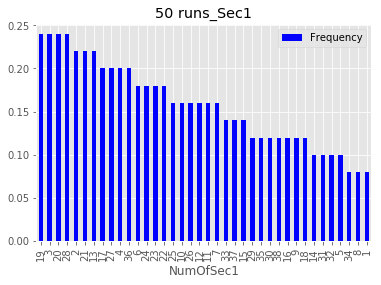

In [17]:
Sone50.plot.bar(x='NumOfSec1',y=['Frequency'],color = "b" )
plt.title("50 runs_Sec1")

Text(0.5,1,'50 runs_Sec2')

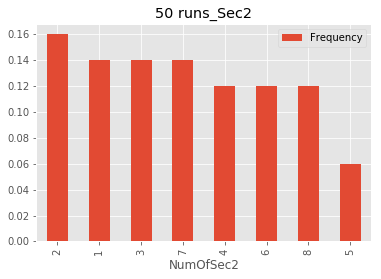

In [18]:
Stwo50.plot.bar(x='NumOfSec2',y=['Frequency'] )
plt.title("50 runs_Sec2")

### 結語:
###### 由近五十期威力採出現號碼分析，可發現第二區中5出現的頻率明顯低於其他號碼，在第一區中，號碼1、8、34出現頻率也明顯較低。
###### 可依歷年分析觀察這些號碼頻率的一些現象，若增加觀察所分析的期數，或許可以擬出購買威力彩的一些攻略。